In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense,Dropout,BatchNormalization,Flatten,LeakyReLU

In [ ]:
from keras.applications.resnet import ResNet101
from keras.applications.resnet import preprocess_input

In [ ]:
image_size=224
BATCH_SIZE=32

In [ ]:
train_datagenerator = ImageDataGenerator(dtype='float32',preprocessing_function=preprocess_input,horizontal_flip=True,validation_split=1/3,rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
fill_mode="nearest")

In [ ]:
train_generator = train_datagenerator.flow_from_directory(
        '/content/drive/My Drive/Data/Images/final part2 data/data/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE,
        class_mode='categorical',subset="training")

Found 3600 images belonging to 15 classes.


In [ ]:
validation_generator=train_datagenerator.flow_from_directory(
        '/content/drive/My Drive/Data/Images/final part2 data/data/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE,
        class_mode='categorical',subset="validation")

Found 1800 images belonging to 15 classes.


In [ ]:
test_datagenerator = ImageDataGenerator(dtype='float32',preprocessing_function=preprocess_input,horizontal_flip=True,rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
fill_mode="nearest")

In [ ]:
test_generator = test_datagenerator.flow_from_directory(
        '/content/drive/My Drive/Data/Images/final part2 data/data/test',
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical')

Found 1800 images belonging to 15 classes.


### ResNet101


In [ ]:
resnet101=ResNet101(include_top=False,input_shape=(224,224,3), pooling = 'avg', weights='imagenet')

In [ ]:
model=Sequential()
model.add(resnet101)


#ANN
model.add(Dense(512))
model.add(LeakyReLU(0.25))
model.add(Dropout(0.5))

model.layers[0].trainable = False
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Model)            (None, 2048)              42658176  
_________________________________________________________________
dense_27 (Dense)             (None, 512)               1049088   
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 15)                7695      
Total params: 43,714,959
Trainable params: 1,056,783
Non-trainable params: 42,658,176
_________________________________________________________________


In [ ]:
start=time.time()

history=model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    validation_data = validation_generator, 
    validation_steps = 10,
    epochs =50)

end=time.time()
print("\n")
print("Total training time:", (end-start)/60," minutes.")

Epoch 1/50
10/10 [==============================] - 29s 3s/step - loss: 2.5632 - accuracy: 0.2250 - val_loss: 0.9562 - val_accuracy: 0.6906
Epoch 2/50
10/10 [==============================] - 13s 1s/step - loss: 1.2075 - accuracy: 0.5921 - val_loss: 0.8324 - val_accuracy: 0.8000
Epoch 3/50
10/10 [==============================] - 17s 2s/step - loss: 0.8239 - accuracy: 0.7281 - val_loss: 0.3203 - val_accuracy: 0.8687
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 0.6825 - accuracy: 0.7781 - val_loss: 0.8006 - val_accuracy: 0.8219
Epoch 5/50
10/10 [==============================] - 19s 2s/step - loss: 0.6144 - accuracy: 0.7969 - val_loss: 0.5337 - val_accuracy: 0.8969
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 0.5813 - accuracy: 0.8031 - val_loss: 0.3109 - val_accuracy: 0.8615
Epoch 7/50
10/10 [==============================] - 15s 2s/step - loss: 0.6593 - accuracy: 0.7750 - val_loss: 0.2187 - val_accuracy: 0.8969
Epoch 8/50
10/10 [==

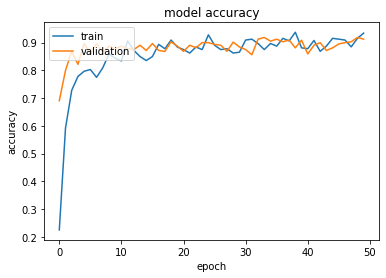

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/resnet101.png")

plt.show()

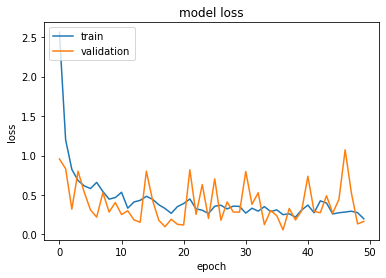

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/resnet101_loss.png")
plt.show()

In [ ]:
_,accuracy = model.evaluate_generator(test_generator,len(test_generator),verbose=1) 

1800/1800 [==============================] - 78s 43ms/step


In [ ]:
accuracy

0.9072222113609314

### Fine-tuned Resnet101


In [ ]:
resnet101=ResNet101(include_top=False,input_shape=(224,224,3), pooling = 'avg', weights='imagenet')

#### Number of layers

In [ ]:
len(resnet101.layers)

346

In [ ]:
for layer in resnet101.layers[:-60]:
	    layer.trainable=False

In [ ]:
i=0
for layer in resnet101.layers:
  print(i,layer,layer.trainable)
  i+=1

0 <keras.engine.input_layer.InputLayer object at 0x7efe1713cf98> False
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7efe1713ccc0> False
2 <keras.layers.convolutional.Conv2D object at 0x7efe1713ce10> False
3 <keras.layers.normalization.BatchNormalization object at 0x7efe20a2cc18> False
4 <keras.layers.core.Activation object at 0x7efe1873e4a8> False
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7efe17147390> False
6 <keras.layers.pooling.MaxPooling2D object at 0x7efe186df860> False
7 <keras.layers.convolutional.Conv2D object at 0x7efe1867af98> False
8 <keras.layers.normalization.BatchNormalization object at 0x7efe18666a58> False
9 <keras.layers.core.Activation object at 0x7efe18666940> False
10 <keras.layers.convolutional.Conv2D object at 0x7efe1867fba8> False
11 <keras.layers.normalization.BatchNormalization object at 0x7efe186aae10> False
12 <keras.layers.core.Activation object at 0x7efe2085f9e8> False
13 <keras.layers.convolutional.Conv2D object at 0x7efe1a1553c8>

In [ ]:
model=Sequential()
model.add(resnet101)

#ANN
model.add(Dense(512))
model.add(LeakyReLU(0.25))
model.add(Dropout(0.5))

model.add(Dense(15, activation='softmax'))

model.compile(optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Model)            (None, 2048)              42658176  
_________________________________________________________________
dense_29 (Dense)             (None, 512)               1049088   
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 15)                7695      
Total params: 43,714,959
Trainable params: 19,126,031
Non-trainable params: 24,588,928
_________________________________________________________________


In [ ]:
start=time.time()

history=model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    validation_data = validation_generator, 
    validation_steps = 10,
    epochs =50)

end=time.time()
print("\n")
print("Total training time:", (end-start)/60," minutes.")

Epoch 1/50
10/10 [==============================] - 30s 3s/step - loss: 3.1773 - accuracy: 0.0938 - val_loss: 2.3806 - val_accuracy: 0.2500
Epoch 2/50
10/10 [==============================] - 15s 1s/step - loss: 2.5070 - accuracy: 0.2434 - val_loss: 2.1157 - val_accuracy: 0.4594
Epoch 3/50
10/10 [==============================] - 19s 2s/step - loss: 1.8481 - accuracy: 0.4156 - val_loss: 0.8230 - val_accuracy: 0.6313
Epoch 4/50
10/10 [==============================] - 18s 2s/step - loss: 1.3711 - accuracy: 0.6219 - val_loss: 0.7951 - val_accuracy: 0.7906
Epoch 5/50
10/10 [==============================] - 20s 2s/step - loss: 1.0730 - accuracy: 0.6781 - val_loss: 0.5979 - val_accuracy: 0.7969
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 0.9903 - accuracy: 0.6875 - val_loss: 0.3925 - val_accuracy: 0.8209
Epoch 7/50
10/10 [==============================] - 17s 2s/step - loss: 0.9100 - accuracy: 0.7250 - val_loss: 0.4752 - val_accuracy: 0.8313
Epoch 8/50
10/10 [==

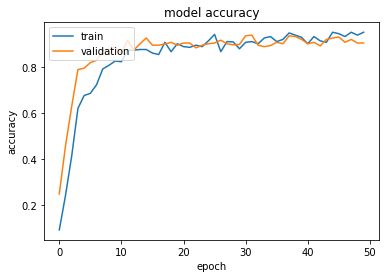

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/tuned_resnet101.png")

plt.show()

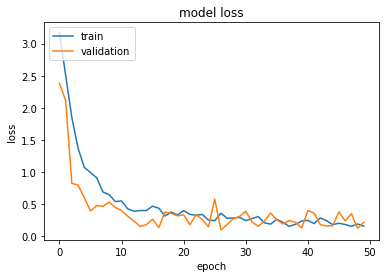

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/tuned_resnet101_loss.png")
plt.show()

In [ ]:
_,accuracy = model.evaluate_generator(test_generator,len(test_generator),verbose=1) 

1800/1800 [==============================] - 78s 43ms/step


In [ ]:
accuracy

0.9394444227218628

###  VGG19

In [ ]:
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input

In [ ]:
train_datagenerator = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,validation_split=1/3,rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
fill_mode="nearest")

In [ ]:
train_generator = train_datagenerator.flow_from_directory(
        '/content/drive/My Drive/Data/Images/final part2 data/data/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE,
        class_mode='categorical',subset="training")

Found 3600 images belonging to 15 classes.


In [ ]:
validation_generator=train_datagenerator.flow_from_directory(
        '/content/drive/My Drive/Data/Images/final part2 data/data/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE,
        class_mode='categorical',subset="validation")

Found 1800 images belonging to 15 classes.


In [ ]:
test_datagenerator = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
fill_mode="nearest")

In [ ]:
test_generator = test_datagenerator.flow_from_directory(
        '/content/drive/My Drive/Data/Images/final part2 data/data/test',
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical')

Found 1800 images belonging to 15 classes.


In [ ]:
vgg19 = VGG19(weights='imagenet', include_top=False, pooling = 'avg',input_shape=(224,224, 3))

In [ ]:
model = Sequential()
model.add(vgg19)

#ANN
model.add(Dense(1024))
model.add(LeakyReLU(0.25))
model.add(Dropout(0.5))


model.layers[0].trainable = False
model.add(Dense(15, activation='softmax'))

model.compile(optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
dense_69 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 15)                15375     
Total params: 20,565,071
Trainable params: 540,687
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
start=time.time()

history=model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    validation_data = validation_generator, 
    validation_steps = 10,
    epochs =50)

end=time.time()
print("\n")
print("Total training time:", (end-start)/60," minutes.")

Epoch 1/50
10/10 [==============================] - 18s 2s/step - loss: 5.6782 - accuracy: 0.1688 - val_loss: 2.4305 - val_accuracy: 0.3969
Epoch 2/50
10/10 [==============================] - 17s 2s/step - loss: 2.8818 - accuracy: 0.3844 - val_loss: 1.1699 - val_accuracy: 0.7469
Epoch 3/50
10/10 [==============================] - 16s 2s/step - loss: 1.7374 - accuracy: 0.5656 - val_loss: 0.9496 - val_accuracy: 0.7812
Epoch 4/50
10/10 [==============================] - 17s 2s/step - loss: 1.2149 - accuracy: 0.6719 - val_loss: 0.7061 - val_accuracy: 0.8094
Epoch 5/50
10/10 [==============================] - 16s 2s/step - loss: 1.0586 - accuracy: 0.7437 - val_loss: 0.8348 - val_accuracy: 0.7906
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 0.8602 - accuracy: 0.7844 - val_loss: 0.4111 - val_accuracy: 0.8378
Epoch 7/50
10/10 [==============================] - 15s 1s/step - loss: 0.8684 - accuracy: 0.7406 - val_loss: 0.2786 - val_accuracy: 0.8656
Epoch 8/50
10/10 [==

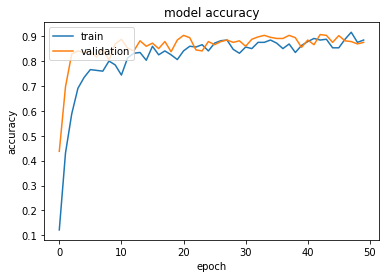

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/vgg19.png")

plt.show()

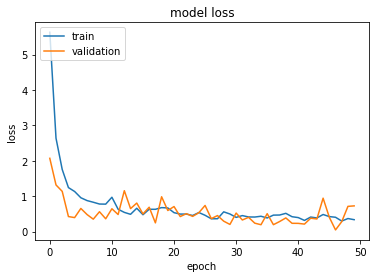

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/vgg19_loss.png")
plt.show()

In [ ]:
_,accuracy = model.evaluate_generator(test_generator,len(test_generator),verbose=1) 

1800/1800 [==============================] - 67s 37ms/step


In [ ]:
accuracy

0.8922222256660461

### Fine-tuned VGG19

In [ ]:
vgg19 = VGG19(weights='imagenet', include_top=False, pooling = 'avg',input_shape=(224,224, 3))

In [ ]:
len(vgg19.layers)

23

In [ ]:
for layer in vgg19.layers[:-6]:
	    layer.trainable=False

In [ ]:
i=0
for layer in vgg19.layers:
  print(i,layer,layer.trainable)
  i+=1

0 <keras.engine.input_layer.InputLayer object at 0x7efe1a600400> False
1 <keras.layers.convolutional.Conv2D object at 0x7efe1a600e80> False
2 <keras.layers.convolutional.Conv2D object at 0x7efe1a600240> False
3 <keras.layers.pooling.MaxPooling2D object at 0x7efe1a600208> False
4 <keras.layers.convolutional.Conv2D object at 0x7efe1a600c88> False
5 <keras.layers.convolutional.Conv2D object at 0x7efe1a6159b0> False
6 <keras.layers.pooling.MaxPooling2D object at 0x7efe1a940908> False
7 <keras.layers.convolutional.Conv2D object at 0x7efe1a940748> False
8 <keras.layers.convolutional.Conv2D object at 0x7efe1a960438> False
9 <keras.layers.convolutional.Conv2D object at 0x7efe1a960e10> False
10 <keras.layers.convolutional.Conv2D object at 0x7efe1a959a58> False
11 <keras.layers.pooling.MaxPooling2D object at 0x7efe1a9f54e0> False
12 <keras.layers.convolutional.Conv2D object at 0x7efe1a9f5320> False
13 <keras.layers.convolutional.Conv2D object at 0x7efe1a9f5fd0> False
14 <keras.layers.convolution

In [ ]:
model = Sequential()
model.add(vgg19)

#ANN
model.add(Dense(1024))
model.add(LeakyReLU(0.25))
model.add(Dropout(0.5))

model.add(Dense(15, activation='softmax'))

model.compile(optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
dense_95 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 15)                15375     
Total params: 20,565,071
Trainable params: 9,979,919
Non-trainable params: 10,585,152
_________________________________________________________________


In [ ]:
start=time.time()

history=model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    validation_data = validation_generator, 
    validation_steps = 10,
    epochs =50)

end=time.time()
print("\n")
print("Total training time:", (end-start)/60," minutes.")

Epoch 1/50
10/10 [==============================] - 18s 2s/step - loss: 3.4587 - accuracy: 0.1125 - val_loss: 2.5763 - val_accuracy: 0.2406
Epoch 2/50
10/10 [==============================] - 17s 2s/step - loss: 2.5223 - accuracy: 0.1875 - val_loss: 2.4405 - val_accuracy: 0.3344
Epoch 3/50
10/10 [==============================] - 16s 2s/step - loss: 2.2929 - accuracy: 0.2688 - val_loss: 2.0113 - val_accuracy: 0.3156
Epoch 4/50
10/10 [==============================] - 16s 2s/step - loss: 2.1679 - accuracy: 0.2844 - val_loss: 1.8123 - val_accuracy: 0.4062
Epoch 5/50
10/10 [==============================] - 15s 1s/step - loss: 1.9889 - accuracy: 0.3421 - val_loss: 1.5364 - val_accuracy: 0.4812
Epoch 6/50
10/10 [==============================] - 17s 2s/step - loss: 1.5656 - accuracy: 0.4750 - val_loss: 1.0089 - val_accuracy: 0.5811
Epoch 7/50
10/10 [==============================] - 15s 1s/step - loss: 1.4763 - accuracy: 0.5219 - val_loss: 1.0397 - val_accuracy: 0.6031
Epoch 8/50
10/10 [==

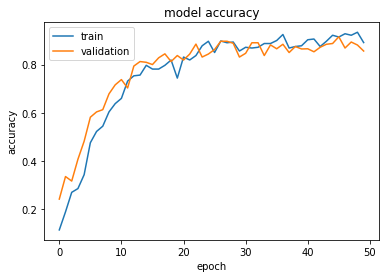

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/tuned_vgg19.png")

plt.show()

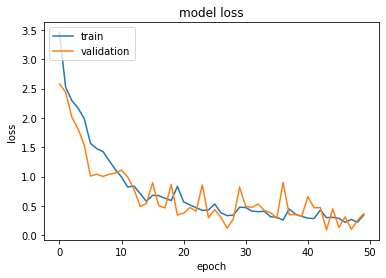

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/tuned_vgg19_loss.png")
plt.show()

In [ ]:
_,accuracy = model.evaluate_generator(test_generator,len(test_generator),verbose=1) 

1800/1800 [==============================] - 65s 36ms/step


In [ ]:
accuracy

0.8933333158493042

###  Inception V3

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

In [ ]:
inception_v3 = InceptionV3( pooling = 'avg',input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [ ]:
train_datagenerator = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,validation_split=1/3,rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
fill_mode="nearest")

In [ ]:
train_generator = train_datagenerator.flow_from_directory(
        '/content/drive/My Drive/Data/Images/final part2 data/data/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE,
        class_mode='categorical',subset="training")

Found 3600 images belonging to 15 classes.


In [ ]:
validation_generator=train_datagenerator.flow_from_directory(
        '/content/drive/My Drive/Data/Images/final part2 data/data/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE,
        class_mode='categorical',subset="validation")

Found 1800 images belonging to 15 classes.


In [ ]:
test_datagenerator = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
fill_mode="nearest")

In [ ]:
test_generator = test_datagenerator.flow_from_directory(
        '/content/drive/My Drive/Data/Images/final part2 data/data/test',
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical')

Found 1800 images belonging to 15 classes.


In [ ]:
model = Sequential()
model.add(inception_v3)

#ANN
model.add(Dense(512))
model.add(LeakyReLU(0.25))
model.add(Dropout(0.25))

model.add(Dense(15, activation='softmax'))
model.layers[0].trainable = False

model.compile(optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_41 (Dense)             (None, 512)               1049088   
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 15)                7695      
Total params: 22,859,567
Trainable params: 1,056,783
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
start=time.time()

history=model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    validation_data = validation_generator, 
    validation_steps = 10,
    epochs =50)

end=time.time()
print("\n")
print("Total training time:", (end-start)/60," minutes.")

Epoch 1/50
10/10 [==============================] - 22s 2s/step - loss: 2.8080 - accuracy: 0.1063 - val_loss: 2.7071 - val_accuracy: 0.0812
Epoch 2/50
10/10 [==============================] - 13s 1s/step - loss: 2.7300 - accuracy: 0.1094 - val_loss: 2.5627 - val_accuracy: 0.1594
Epoch 3/50
10/10 [==============================] - 15s 2s/step - loss: 2.6162 - accuracy: 0.1594 - val_loss: 2.5597 - val_accuracy: 0.1906
Epoch 4/50
10/10 [==============================] - 16s 2s/step - loss: 2.6005 - accuracy: 0.1344 - val_loss: 2.4223 - val_accuracy: 0.2656
Epoch 5/50
10/10 [==============================] - 16s 2s/step - loss: 2.4916 - accuracy: 0.1969 - val_loss: 2.0638 - val_accuracy: 0.3469
Epoch 6/50
10/10 [==============================] - 18s 2s/step - loss: 2.4444 - accuracy: 0.1844 - val_loss: 2.0346 - val_accuracy: 0.3581
Epoch 7/50
10/10 [==============================] - 14s 1s/step - loss: 2.3616 - accuracy: 0.2625 - val_loss: 1.9784 - val_accuracy: 0.4281
Epoch 8/50
10/10 [==

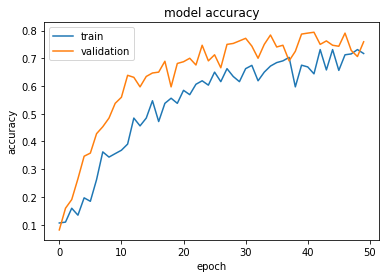

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/inception_v3.png")

plt.show()

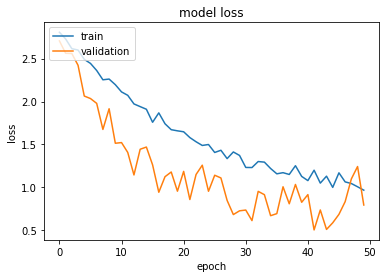

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/inception_v3_loss.png")
plt.show()

In [ ]:
_,accuracy = model.evaluate_generator(test_generator,len(test_generator),verbose=1) 

1800/1800 [==============================] - 74s 41ms/step


In [ ]:
accuracy

0.7955555319786072

### Fine-tuned Inception V3

In [ ]:
inception_v3 = InceptionV3( pooling = 'avg',input_shape=(224,224, 3), weights='imagenet', include_top=False)

In [ ]:
len(inception_v3.layers)

312

In [ ]:
for layer in inception_v3.layers[:-100]:
	    layer.trainable=False

In [ ]:
i=0
for layer in inception_v3.layers:
  print(i,layer,layer.trainable)
  i+=1

0 <keras.engine.input_layer.InputLayer object at 0x7effecd3edd8> False
1 <keras.layers.convolutional.Conv2D object at 0x7effeac2aba8> False
2 <keras.layers.normalization.BatchNormalization object at 0x7effecd7a0b8> False
3 <keras.layers.core.Activation object at 0x7effecd7a080> False
4 <keras.layers.convolutional.Conv2D object at 0x7effeac894a8> False
5 <keras.layers.normalization.BatchNormalization object at 0x7effecd15748> False
6 <keras.layers.core.Activation object at 0x7effee7a3c18> False
7 <keras.layers.convolutional.Conv2D object at 0x7effecd22f60> False
8 <keras.layers.normalization.BatchNormalization object at 0x7effecd279e8> False
9 <keras.layers.core.Activation object at 0x7effec4c6c50> False
10 <keras.layers.pooling.MaxPooling2D object at 0x7effec4e6d68> False
11 <keras.layers.convolutional.Conv2D object at 0x7effec4e6d30> False
12 <keras.layers.normalization.BatchNormalization object at 0x7effeccc7b70> False
13 <keras.layers.core.Activation object at 0x7effec4f8550> False


In [ ]:
model = Sequential()
model.add(inception_v3)

#ANN
model.add(Dense(512))
model.add(LeakyReLU(0.25))
model.add(Dropout(0.25))

model.add(Dense(15, activation='softmax'))

model.compile(optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1049088   
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                7695      
Total params: 22,859,567
Trainable params: 13,721,039
Non-trainable params: 9,138,528
_________________________________________________________________


In [ ]:
start=time.time()

history=model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    validation_data = validation_generator, 
    validation_steps = 10,
    epochs =50)

end=time.time()
print("\n")
print("Total training time:", (end-start)/60," minutes.")

Epoch 1/50
10/10 [==============================] - 23s 2s/step - loss: 2.6716 - accuracy: 0.1187 - val_loss: 2.2167 - val_accuracy: 0.3250
Epoch 2/50
10/10 [==============================] - 14s 1s/step - loss: 1.9719 - accuracy: 0.5063 - val_loss: 1.3499 - val_accuracy: 0.6594
Epoch 3/50
10/10 [==============================] - 16s 2s/step - loss: 1.4032 - accuracy: 0.7125 - val_loss: 1.1227 - val_accuracy: 0.8094
Epoch 4/50
10/10 [==============================] - 16s 2s/step - loss: 1.0118 - accuracy: 0.8250 - val_loss: 0.6699 - val_accuracy: 0.8500
Epoch 5/50
10/10 [==============================] - 16s 2s/step - loss: 0.7864 - accuracy: 0.8469 - val_loss: 0.5914 - val_accuracy: 0.8562
Epoch 6/50
10/10 [==============================] - 17s 2s/step - loss: 0.6073 - accuracy: 0.8938 - val_loss: 0.6006 - val_accuracy: 0.8378
Epoch 7/50
10/10 [==============================] - 15s 1s/step - loss: 0.5920 - accuracy: 0.8375 - val_loss: 0.3029 - val_accuracy: 0.8844
Epoch 8/50
10/10 [==

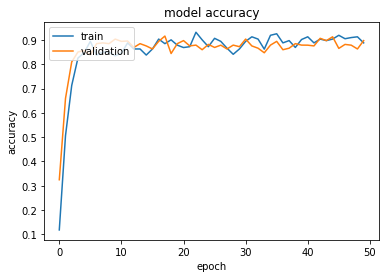

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/tuned inception_v3.png")
plt.show()

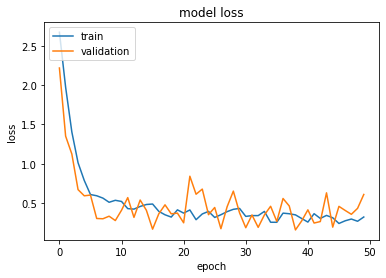

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("/content/drive/My Drive/Data/Images/tuned inception_v3_loss.png")
plt.show()

In [ ]:
_,accuracy = model.evaluate_generator(test_generator,len(test_generator),verbose=1) 

1800/1800 [==============================] - 72s 40ms/step


In [ ]:
accuracy

0.9011111259460449